In [1]:
import kagglehub
import matplotlib.pyplot as plt
import pandas as pd
import sklearn
import sklearn.metrics
import sklearn.linear_model
import sklearn.model_selection
import sklearn.preprocessing

In [2]:
# Download latest Energy Fraud Detection version
path = kagglehub.dataset_download("taruneshburman/energy-fraud-detection")

print("Path to dataset files:", path)

Path to dataset files: C:\Users\l.mora\.cache\kagglehub\datasets\taruneshburman\energy-fraud-detection\versions\1


In [3]:
data = pd.read_csv(f"{path}\\Energy_Fraud_Detection.csv", low_memory=False)

res_data = data[
    (data.Meter_Type == "Digital") &
    (data.Customer_Type == "Residential")
]
com_data = data[
    (data.Meter_Type == "Digital") &
    (data.Customer_Type == "Commercial")
]

print(f"[RESIDENTIAL] Number of instances:\t{len(res_data)}")
print(f"[COMMMERCIAL] Number of instances:\t{len(com_data)}")
print(f"Total number of columns:\t\t{len(com_data.columns)}")
print(f"Column names:\n\t- {";\n\t- ".join(list(com_data.columns))}.")

[RESIDENTIAL] Number of instances:	269
[COMMMERCIAL] Number of instances:	268
Total number of columns:		11
Column names:
	- Customer_Type;
	- Average_Bill_Amount;
	- Meter_Readings_Deviation;
	- Billing_Cycle;
	- Historical_Consumption;
	- Meter_Type;
	- Tampering_Alerts;
	- Last_Inspection_Days;
	- Peak_Usage_Anomalies;
	- Complaints_Logged;
	- Fraud_Status.


In [4]:
features = [
    # 'Customer_Type',
    'Average_Bill_Amount',
    'Meter_Readings_Deviation',
    # 'Billing_Cycle',
    'Historical_Consumption',
    # 'Meter_Type',
    # 'Tampering_Alerts',
    'Last_Inspection_Days',
    'Peak_Usage_Anomalies',
    # 'Complaints_Logged'
]
target = 'Fraud_Status'
target_labels = ['Confirmed Fraud', 'No Fraud', 'Potential Fraud']

print(f"Training features:\n\t- {";\n\t- ".join(features)}.")
print(f"Target variable:\n\t- {target}")

Training features:
	- Average_Bill_Amount;
	- Meter_Readings_Deviation;
	- Historical_Consumption;
	- Last_Inspection_Days;
	- Peak_Usage_Anomalies.
Target variable:
	- Fraud_Status


In [5]:
res_train, res_test = sklearn.model_selection.train_test_split(res_data, test_size=.2, random_state=42, shuffle=True)
com_train, com_test = sklearn.model_selection.train_test_split(com_data, test_size=.2, random_state=42, shuffle=True)

print(f"[RESIDENTIAL] Training set instances:\t{len(res_train)}")
print(f"[COMMMERCIAL] Training set instances:\t{len(com_train)}\n")
print(f"[RESIDENTIAL] Test set instances:\t{len(res_test)}")
print(f"[COMMMERCIAL] Test set instances:\t{len(com_test)}")

[RESIDENTIAL] Training set instances:	215
[COMMMERCIAL] Training set instances:	214

[RESIDENTIAL] Test set instances:	54
[COMMMERCIAL] Test set instances:	54


## Residential PODs

In [6]:
res_x_train = res_train[features].to_numpy()
res_y_train = res_train[target].astype("category")

res_x_test = res_test[features].to_numpy()
res_y_test = res_test[target].astype("category")

In [7]:
scaler = sklearn.preprocessing.StandardScaler()
res_scaled_x_train = scaler.fit_transform(res_x_train)

In [8]:
res_clf = sklearn.linear_model.Perceptron(
    # loss="squared_hinge",
    max_iter=3000,
    random_state=42
)
res_fitted_clf = res_clf.fit(res_scaled_x_train, res_y_train)

In [9]:
res_y_pred = res_fitted_clf.predict(scaler.transform(res_x_test))
res_results = pd.DataFrame({"EXPECTED": res_y_test, "PREDICTED": res_y_pred})

In [ ]:
res_results.head(15)

,EXPECTED,PREDICTED
99,No Fraud,No Fraud
393,Potential Fraud,Confirmed Fraud
289,Confirmed Fraud,No Fraud
427,Confirmed Fraud,No Fraud
665,Confirmed Fraud,Confirmed Fraud
460,Confirmed Fraud,Potential Fraud
739,Confirmed Fraud,Potential Fraud
170,No Fraud,No Fraud
598,No Fraud,Confirmed Fraud
898,Potential Fraud,No Fraud


In [11]:
res_fitted_clf.score(res_x_train, res_y_train)

0.3488372093023256

In [12]:
res_fitted_clf.score(res_x_test, res_y_test)

0.25925925925925924

In [13]:
res_confusion_matrix = sklearn.metrics.confusion_matrix(res_y_test, res_y_pred)

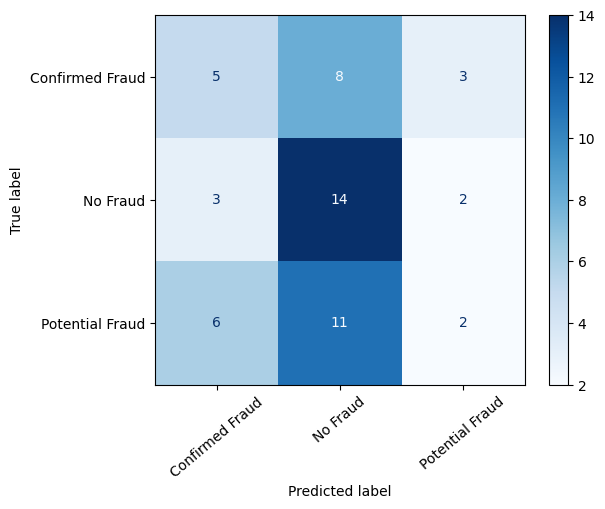

In [14]:
res_cm_display = sklearn.metrics.ConfusionMatrixDisplay(
    confusion_matrix=res_confusion_matrix,
    display_labels=target_labels)

res_cm_display.plot(
    cmap=plt.cm.Blues, # type: ignore
    xticks_rotation=40
)
plt.show()

In [15]:
res_avg_metrics = {
    "accuracy": sklearn.metrics.accuracy_score(res_y_test, res_y_pred),
    "precision": sklearn.metrics.precision_score(
        res_y_test, res_y_pred,
        labels=target_labels,
        average="weighted"),
    "sensitivity": sklearn.metrics.recall_score(
        res_y_test, res_y_pred,
        labels=target_labels,
        average="weighted"),
    "f1_score": sklearn.metrics.f1_score(
        res_y_test, res_y_pred,
        labels=target_labels,
        average="weighted")
}

In [16]:
res_avg_metrics

{'accuracy': 0.3888888888888889,
 'precision': 0.35561968895302226,
 'sensitivity': 0.3888888888888889,
 'f1_score': 0.342355175688509}

In [17]:
print(sklearn.metrics.classification_report(res_y_test, res_y_pred, target_names=target_labels))

                 precision    recall  f1-score   support

Confirmed Fraud       0.36      0.31      0.33        16
       No Fraud       0.42      0.74      0.54        19
Potential Fraud       0.29      0.11      0.15        19

       accuracy                           0.39        54
      macro avg       0.36      0.38      0.34        54
   weighted avg       0.36      0.39      0.34        54



## Commercial PODs

In [18]:
com_x_train = com_train[features].to_numpy()
com_y_train = com_train[target].astype("category")

com_x_test = com_test[features].to_numpy()
com_y_test = com_test[target].astype("category")

In [19]:
scaler = sklearn.preprocessing.StandardScaler()
com_scaled_x_train = scaler.fit_transform(com_x_train)

In [20]:
com_clf = sklearn.linear_model.Perceptron(
    max_iter=3000,
    random_state=42
)
com_fitted_clf = com_clf.fit(com_scaled_x_train, com_y_train)

In [21]:
com_y_pred = com_fitted_clf.predict(scaler.transform(com_x_test))
com_results = pd.DataFrame({"EXPECTED": com_y_test, "PREDICTED": com_y_pred})

In [22]:
com_results.head(15)

,EXPECTED,PREDICTED
428,Potential Fraud,Confirmed Fraud
810,No Fraud,No Fraud
71,Potential Fraud,No Fraud
499,No Fraud,No Fraud
441,No Fraud,No Fraud
630,Potential Fraud,No Fraud
888,Potential Fraud,Potential Fraud
513,Potential Fraud,No Fraud
107,Potential Fraud,Confirmed Fraud
242,Potential Fraud,No Fraud


In [23]:
com_fitted_clf.score(com_x_train, com_y_train)

0.3364485981308411

In [24]:
com_fitted_clf.score(res_x_test, com_y_test)

0.25925925925925924

In [25]:
com_confusion_matrix = sklearn.metrics.confusion_matrix(com_y_test, com_y_pred)

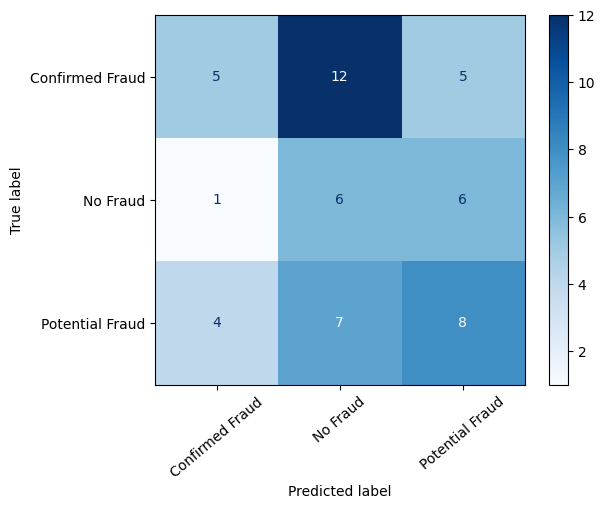

In [ ]:
com_cm_display = sklearn.metrics.ConfusionMatrixDisplay(
    confusion_matrix=com_confusion_matrix,
    display_labels=target_labels)

com_cm_display.plot(
    cmap=plt.cm.Blues, # type: ignore
    xticks_rotation=40
)
plt.show()

In [27]:
com_avg_metrics = {
    "accuracy": sklearn.metrics.accuracy_score(com_y_test, com_y_pred),
    "precision": sklearn.metrics.precision_score(
        com_y_test, com_y_pred,
        labels=target_labels,
        average="weighted"),
    "sensitivity": sklearn.metrics.recall_score(
        com_y_test, com_y_pred,
        labels=target_labels,
        average="weighted"),
    "f1_score": sklearn.metrics.f1_score(
        com_y_test, com_y_pred,
        labels=target_labels,
        average="weighted")
}

In [28]:
com_avg_metrics

{'accuracy': 0.35185185185185186,
 'precision': 0.4096296296296296,
 'sensitivity': 0.35185185185185186,
 'f1_score': 0.35148635477582846}

In [29]:
print(sklearn.metrics.classification_report(com_y_test, com_y_pred, target_names=target_labels))

                 precision    recall  f1-score   support

Confirmed Fraud       0.50      0.23      0.31        22
       No Fraud       0.24      0.46      0.32        13
Potential Fraud       0.42      0.42      0.42        19

       accuracy                           0.35        54
      macro avg       0.39      0.37      0.35        54
   weighted avg       0.41      0.35      0.35        54

